In [31]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import sys
import bpy

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
dataset = ObjaverseDataset3D()
dataset.statistics.sample(n=5)

,meshCount,uvCount,diffuseCount,uvScore,valid
uid,,,,,
5477accb9d294cd18962dd461d08b9e0,5,<NA>,<NA>,<NA>,<NA>
167e3e039de04d399834143a34fa8924,1,1,0,0.987301,False
6872b2253c6f48ebb445437e3ff2d7b7,8,<NA>,<NA>,<NA>,<NA>
906003b25fec421590d4d56f2144d891,1,1,0,0.362624,False
567bf7b6e874403390adad0ecccbe4dd,1,1,0,0.498175,False


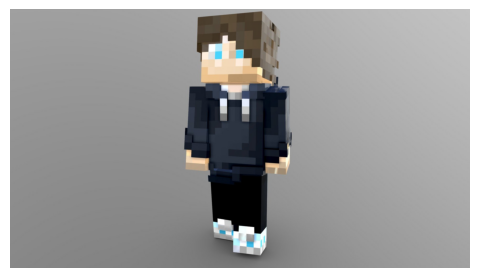

Found 1 materials, 12 UV-maps, 1 diffuse in 12 objects


In [35]:
UID = "eb48e725751a4ecbab5bb490c34014f9"
imshow((obj3d:=dataset[UID]).renderings, size=6)
processor = Processor(obj3d)
processor.analyze_scene()

In [37]:
processor.group_meshes()
processor.analyze_scene()

Joined (12) objects from (material_0) materials
Found 1 materials, 1 UV-maps, 1 diffuse in 1 objects


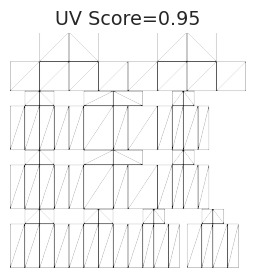

In [38]:
imshow({f"UV Score={obj3d.uv_score(bpy.data.objects[i].data):.2f}": uv for i, uv in enumerate(processor.uvs(pil=True))})

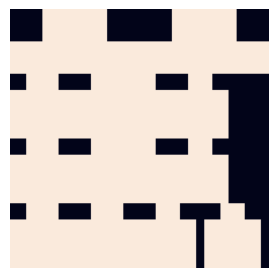

In [26]:
imshow(processor.masks())

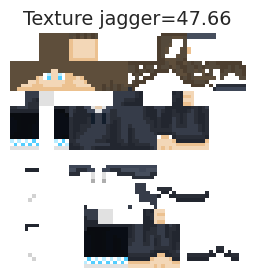

In [63]:
filter = LaplacianFilter()
imshow({f"Texture jagger={filter(diff)[0]:.2f}": diff for diff in processor.diffuses(pil=True)})